In [50]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

In [61]:
G = nx.karate_club_graph()

In [52]:
# A=nx.to_numpy_matrix(G)#+np.eye(len(G.nodes()))
def adyacencia(G):
    # Inicializamos la matriz de adyacencia con ceros. 
    adj_mat = np.zeros((len(G), len(G)), dtype=int)

    for node in G:
        for neighbor in G.neighbors(node):
            adj_mat[node][neighbor] = 1
        adj_mat[node][node] = 0 # vecindario inclusivo

    return adj_mat

In [53]:
A=adyacencia(G)

In [54]:
def transition(i,j,G,A):
    LDN=list(G.nodes())
    return A[LDN.index(i),LDN.index(j)]/G.degree(i)
    

In [55]:
def step(i,G,A):
    N=[vecino for vecino in nx.neighbors(G,i)]
    coeficiente_part=[]
    for v in N:
        coeficiente_part.append(transition(i,v,G,A))
    part=[]
    aux=0
    for coef in coeficiente_part:
        part.append(aux+coef)
        aux=aux+coef
    r=np.random.random()
    for p in range(len(part)):
        if p==0:
            if r<part[p]:
                indexf=0
                break
        if p>0:
            if p==len(part)-1:
                indexf=p
                break
            elif (part[p-1]<r  and r<part[p])==True: 
                indexf=p
                break
    return N[indexf]
        
    
        

In [56]:
ic=21
Orbit=[ic]
for i in range(10000):
    ic=step(ic,G,A)
    Orbit.append(ic)
    

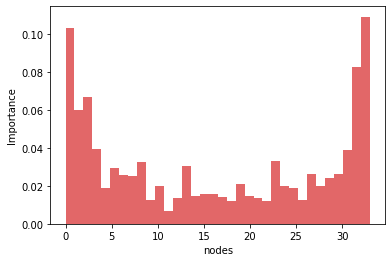

In [57]:
plt.figure()
plt.hist(Orbit,bins=34,color='tab:red',alpha=0.7,density=True)
plt.xlabel('nodes')
plt.ylabel('Importance')
plt.show()

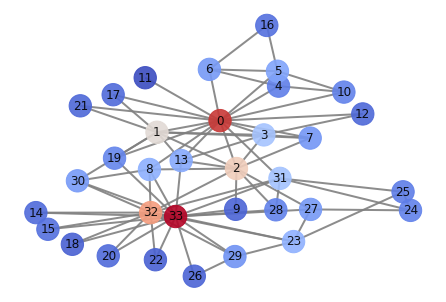

In [58]:
import pylab as plt
node_color=[float(Orbit.count(i)) for i in range(34)]
cmap = plt.cm.coolwarm
#cmap = plt.cm.plasma
#cmap = plt.cm.seismic
#cmap = plt.cm.Spectral_r
#cmap = plt.cm.jet

#plt.figure(figsize=(6,6), dpi=300)
plt.figure()
#pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.spectral_layout(G)

nx.draw(G, pos, node_color=node_color, node_size=500, edge_color='gray',
        width=2, with_labels=True, cmap=cmap,alpha=0.9)
plt.show()